# KNN

### What is KNN?

- Supervised Algorithm
- Makes predictions based on how close a new data point is to known data points.
- Lazy
- Sensitive to scaling

Link: [KNN Diagram](https://cambridgecoding.files.wordpress.com/2016/01/knn2.jpg)

#### Pros:
1. Simple
2. Robust to noise
3. Effective with large datasets
4. Performs calculations "just in time"
5. Data is easy to keep up to date to keep predictions accurate

#### Cons:
1. Need to determine how many neighbors is optimal
2. Computation cost is high (has to calculate every single distance to every feature)
3. Euclidean volume increases exponentially as number of features increases (curse of dimensionality)

In [1]:
# Quiet my warnings for the sake of the lesson:
import warnings
warnings.filterwarnings("ignore")

# Tabular data friends:
import pandas as pd
import numpy as np

# Data viz:
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn stuff:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Data acquisition
from pydataset import data

## Acquire (Iris Dataset)

In [2]:
# read Iris data from pydatset
df = data('iris')

In [3]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
# conveniently for me in this scenario, the units of measurement
# within iris are consistent

## Prepare/Preprocessing

In [6]:
# split into train, validate, test
train, test = train_test_split(df, 
                               stratify=df['species'], 
                               train_size=0.8, 
                               random_state=1349)
train, validate = train_test_split(train, 
                                   stratify=train['species'], 
                                   train_size=0.7, 
                                   random_state=1349)

In [7]:
# previously, I defined a subset of columns to reference from my train,
# In this case, I am going to specifically definte X_train
# As the subset of values that I want to utilize.

In [8]:
# create X & y version of train/validate/test
# where X contains the features we want to use and y is a series with just the target variable

X_train = train.drop(columns=['species', 'petal_length', 'petal_width'])
y_train = train.species

In [9]:
X_validate = validate.drop(columns=['species', 'petal_length', 'petal_width'])
y_validate = validate.species

In [10]:
X_test = test.drop(columns=['species', 'petal_length', 'petal_width'])
y_test = test.species

In [11]:
train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
X_validate.columns

Index(['sepal_length', 'sepal_width'], dtype='object')

In [13]:
X_train.columns

Index(['sepal_length', 'sepal_width'], dtype='object')

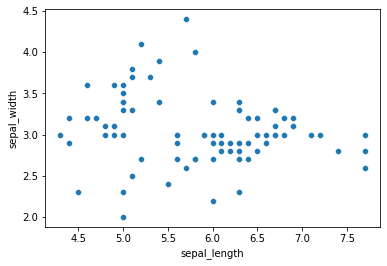

In [14]:
sns.scatterplot(data=X_train, x='sepal_length', y='sepal_width');

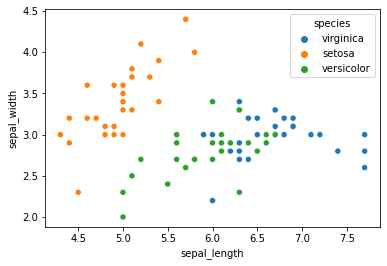

In [15]:
sns.scatterplot(data=train, x='sepal_length', y='sepal_width', hue='species');

## Train Model

#### Create KNN Object

In [ ]:
# steps remain the same:
# 1: make the thing
# 2: fit the thing
# 3: use the thing

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)

#### Fit the Model to the Training Data

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Make Predictions

In [18]:
y_pred = knn.predict(X_train)

In [20]:
y_pred[:5]

array(['virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor'],
      dtype=object)

#### Estimate Probability

In [21]:
y_pred_proba = knn.predict_proba(X_train)

In [24]:
y_pred_proba[:5]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [26]:
# note: .unique() does not give the correct lexographic order of classes
train.species.unique()

array(['virginica', 'setosa', 'versicolor'], dtype=object)

In [56]:
y_train.value_counts().index

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

In [57]:
# the model object's classes_ property 
# is the most dependable way to get the order of predict_proba labels.
knn.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [22]:
y_pred_proba[:5]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

## Evaluate Model

#### Compute the Accuracy

In [30]:
confusion_matrix(y_train, y_pred)

array([[28,  0,  0],
       [ 0, 27,  1],
       [ 0,  4, 24]])

In [29]:
pd.crosstab(y_train, y_pred)

col_0,setosa,versicolor,virginica
species,,,
setosa,28,0,0
versicolor,0,27,1
virginica,0,4,24


In [31]:
# y_train

#### Create a Classification Report

In [33]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.87      0.96      0.92        28
   virginica       0.96      0.86      0.91        28

    accuracy                           0.94        84
   macro avg       0.94      0.94      0.94        84
weighted avg       0.94      0.94      0.94        84



## Lets Do it Again

In [34]:
# Create KNN Object
knn1 = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# Fit object to training data
knn1.fit(X_train, y_train)
# Make predictions on training data
y_pred1 = knn1.predict(X_train)

In [36]:
# Evaluate the new model
print(classification_report(y_train, y_pred1))


              precision    recall  f1-score   support

      setosa       1.00      0.96      0.98        28
  versicolor       0.78      0.75      0.76        28
   virginica       0.77      0.82      0.79        28

    accuracy                           0.85        84
   macro avg       0.85      0.85      0.85        84
weighted avg       0.85      0.85      0.85        84



In [45]:
knn1.score(X_train, y_train)

0.8452380952380952

In [37]:
# classification reports on validate sets

In [39]:
X_validate.head(2)

,sepal_length,sepal_width
6,5.4,3.9
29,5.2,3.4


In [40]:
print(classification_report(y_validate, knn.predict(X_validate)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.62      0.67      0.64        12
   virginica       0.64      0.58      0.61        12

    accuracy                           0.75        36
   macro avg       0.75      0.75      0.75        36
weighted avg       0.75      0.75      0.75        36



In [ ]:
# dropoff in accuracy from 94 to 75 in 1 neighbor model, 
# let's check back on model 2:

In [41]:
print(classification_report(y_validate, knn1.predict(X_validate)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.64      0.75      0.69        12
   virginica       0.70      0.58      0.64        12

    accuracy                           0.78        36
   macro avg       0.78      0.78      0.78        36
weighted avg       0.78      0.78      0.78        36



In [ ]:
# We still experience dropoff inside of knn1, with 5 neighbors, 
# but less dropoff than in our first model.
# We may be able to examine a better performing model, but so far, 5 neighbors 
# is superior to 1

## Finding the Best value for k

In [50]:
# iteration:
model_set = []
model_accuracies = {}
for i in range(1,10):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    model_set.append(clf)
    model_accuracies[f'{i}_neighbors'] = {
        'train_score': round(clf.score(X_train, y_train), 2),
        'validate_score': round(clf.score(X_validate, y_validate), 2)}

In [51]:
model_accuracies

{'1_neighbors': {'train_score': 0.94, 'validate_score': 0.75},
 '2_neighbors': {'train_score': 0.87, 'validate_score': 0.75},
 '3_neighbors': {'train_score': 0.87, 'validate_score': 0.69},
 '4_neighbors': {'train_score': 0.87, 'validate_score': 0.75},
 '5_neighbors': {'train_score': 0.85, 'validate_score': 0.78},
 '6_neighbors': {'train_score': 0.89, 'validate_score': 0.75},
 '7_neighbors': {'train_score': 0.85, 'validate_score': 0.75},
 '8_neighbors': {'train_score': 0.88, 'validate_score': 0.72},
 '9_neighbors': {'train_score': 0.87, 'validate_score': 0.75}}

## Next Steps
- We only used sepal_length and sepal_width. We can try new models with different and/or additional features. 


- There are other hyperparameters we can tweak
    - 'weights': Uniform is the default (all points are treated equally), but we can switch to a 'distance' approach where nearer neighbors are given more weight in the voting process
    - 'algorithm': Large datasets use a sampling algorithm to save on computational cost. We can try different samplers. 
    - 'metric': There is more than one way to measure distance


- There are very similar models that we can try (RadiusNeighborsClassifier)